In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

city_df = pd.DataFrame(cities, columns = {"City"})


city_df["Temperature"] = 0
city_df["Humidity"] = -1
city_df["Cloudiness"] = 0
city_df["WindSpeed"] = 0
city_df["Latitude"] = 0



635


## Perform API Calls

In [27]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#Count to keep track of cities for which weather info is retrieved from the API
count = 0

print("Starting Data Retrieval")
print("---------------------------------------")

for index, row in city_df.iterrows():
        
    count += 1
    
    #Exit the FOR loop if data has been successfully collected for 500 cities
    if count > 500:
        break
        
    time.sleep(1)
    
    #Fetching the city
    city = row['City']
    print(f'Processing record {index+1} | {city}')
    
    #Appending city to the URL
    url = base_url+"&q="+city
    
    print(url)
    
    #Calling the API and storing the JSON response
    response = requests.get(url).json()
    
    try:
        #fetch the required parameters
        city_df.loc[index, "Temperature"] = response['main']['temp_max']
        city_df.loc[index, "Humidity"] = response['main']['humidity']
        city_df.loc[index, "Cloudiness"] = response['clouds']['all']
        city_df.loc[index, "WindSpeed"] = response['wind']['speed']
        city_df.loc[index, "Latitude"] = response["coord"]["lat"]
        
    except:
        #If exception occurs in try above, print a message and reduce the count by -1
        print(f'No details found for {city}')
        count -= 1

Starting Data Retrieval
---------------------------------------
Processing record 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=jamestown
Processing record 2 | caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=caravelas
Processing record 3 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=rikitea
Processing record 4 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=saskylakh
Processing record 5 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ushuaia
Processing record 6 | goya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=goya
Processing record 7 | zunyi
http://api.openweathermap.org/data/2.5/weather?units=Imp

In [28]:
#Filter the DataFrame to remove rows for which no temperature data was retrieved from the API
city_df = city_df[city_df.Humidity != -1]

#Saving the data into a csv file
city_df.to_csv(output_data_file, sep=',', index=False)

#Display top 5 records
city_df.head()

,City,Temperature,Humidity,Cloudiness,WindSpeed,Latitude
0,jamestown,55.13,71,44,11.88,-33.21
1,caravelas,73.58,100,88,9.86,-17.73
2,rikitea,73.67,100,12,11.54,-23.12
3,saskylakh,67.46,71,0,6.89,71.97
4,ushuaia,32.00,100,0,8.05,-54.81


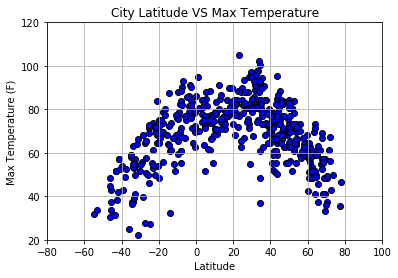

In [29]:
#Plotting a scatter plot for Max temperatue of cities against the latitude and save the image#Plotti 

plt.scatter(city_df["Latitude"],city_df['Temperature'],marker = "o",edgecolors= 'black' ,facecolors = 'blue')
plt.title("City Latitude VS Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-80,100)
plt.ylim(20,120)
plt.grid()
plt.savefig("output_data/LatTemp.png")
plt.show()

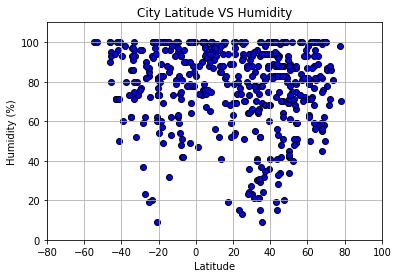

In [30]:
#Plotting a scatter plot for Humidity of cities against the latitude and save the image#Plotti 

plt.scatter(city_df["Latitude"],city_df['Humidity'],marker = "o",edgecolors= 'black' ,facecolors = 'blue')
plt.title("City Latitude VS Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-80,100)
plt.ylim(0,110)
plt.grid()
plt.savefig("output_data/LatHumidity.png")
plt.show()

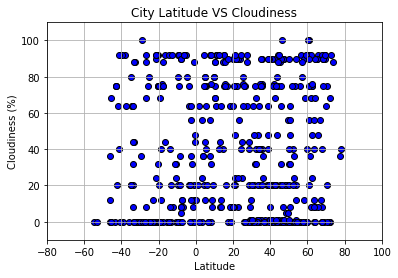

In [31]:
#Plotting a scatter plot for Cloudiness of cities against the latitude and save the image

plt.scatter(city_df["Latitude"],city_df['Cloudiness'],marker = "o",edgecolors= 'black' ,facecolors = 'blue')
plt.title("City Latitude VS Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-80,100)
plt.ylim(-10,110)
plt.grid()
plt.savefig("output_data/LatCloudiness.png")
plt.show()

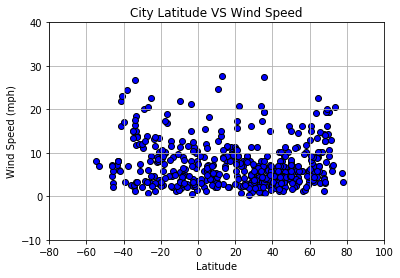

In [32]:
#Plotting a scatter plot for WindSpeed of cities against the latitude and save the image

plt.scatter(city_df["Latitude"],city_df['WindSpeed'],marker = "o",edgecolors= 'black' ,facecolors = 'blue')
plt.title("City Latitude VS Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,100)
plt.ylim(-10,40)
plt.grid()
plt.savefig("output_data/Windspeed.png")
plt.show()